In [532]:
from random import random
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 5

## f)

In [533]:
theta = 20
n = 100
xn = np.array([theta * (random()+1) for i in range(n)])
xn

array([33.14188645, 22.89459066, 34.31423948, 23.0470488 , 26.34017036,
       28.55909973, 37.6485997 , 21.4859213 , 20.13949597, 34.71068233,
       30.98294302, 23.99979203, 30.32374413, 36.35054768, 31.09240908,
       20.1218225 , 26.12820508, 27.84337352, 38.52712791, 20.88403603,
       37.7151253 , 37.31221153, 39.25340303, 33.82609362, 39.15947597,
       33.91097034, 23.00328921, 34.41128216, 35.9705543 , 20.04910418,
       39.81725316, 36.01662507, 25.66585299, 29.11662012, 24.18281624,
       29.28282079, 36.34198947, 21.33836503, 21.37521383, 29.53865835,
       31.6263877 , 31.53678663, 26.37557372, 28.55181364, 32.98414892,
       20.42954903, 23.98531914, 27.65914389, 26.48639861, 34.91369767,
       31.43526734, 35.7846945 , 37.15287689, 29.52973578, 28.10553429,
       33.62549205, 33.8522279 , 38.11412827, 29.21607452, 24.04660507,
       24.61603003, 39.054587  , 24.76153223, 25.16008833, 26.34478321,
       26.54090667, 26.68391184, 31.1666041 , 39.7297089 , 39.39

In [534]:
exact = (
    float(np.max(xn) / (1 + np.pow(0.975, 1 / n))),
    float(np.max(xn) / (1 + np.pow(0.025, 1 / n)))
)

alpha_1 = np.mean(xn)
std = np.std(xn)

asympt = (
    float(-1.96 * np.sqrt(4 / (n * 9)) * std + 2 / 3 * alpha_1),
    float(1.96 * np.sqrt(4 / (n * 9)) * std + 2 / 3 * alpha_1),
)

print(f"Точный доверительный интервал: {exact}")
print(f"Асимптотический доверительный интервал: {asympt}")

Точный доверительный интервал: (19.985200364628938, 20.351197306437953)
Асимптотический доверительный интервал: (19.3979313366244, 20.960218468863804)


## g)

In [535]:
theta_est = (n + 1) / (2 * n + 1) * np.max(xn)

bootstrap = stats.bootstrap(
    (xn, ),
    lambda x: (n + 1) / (2 * n + 1) * np.max(x) - theta_est,
    n_resamples = 1000,
    confidence_level=0.95
    )
bs_ci = bootstrap.confidence_interval
bs_ci = (float(theta_est + bs_ci.low), float(theta_est + bs_ci.high))
print(f"Бутстраповский доверительный интервал: {bs_ci}")

Бутстраповский доверительный интервал: (20.007674472866807, 20.082087050058696)


## h)

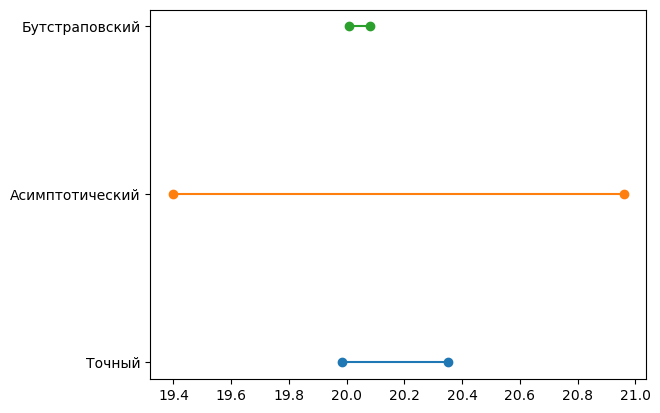

In [542]:
for i, ci in enumerate([exact, asympt, bs_ci]):
    plt.plot((ci[0], ci[1]), (i, i), 'o-')
_ = plt.yticks(range(3),["Точный", "Асимптотический", "Бутстраповский"])

# 6

## d)

In [537]:
theta = 4
n = 100
xn = np.array([np.pow(1-random(), 1/(1-theta)) for i in range(n)])
xn

array([1.287007  , 1.37829877, 2.09638655, 1.09843999, 1.13448788,
       1.08655195, 2.46148611, 1.2466467 , 1.10462378, 1.12985658,
       1.17757563, 1.00546793, 1.26038816, 1.36850406, 1.08310617,
       1.3185418 , 1.03659869, 2.01233192, 1.49393512, 2.62081351,
       3.47227151, 1.73539445, 1.51966686, 1.17973534, 1.13205616,
       1.11827947, 1.04380641, 1.10693557, 1.11840194, 2.34434079,
       1.87487902, 1.76418166, 1.09134923, 1.04198861, 1.08738024,
       5.14698423, 1.07892547, 2.47779736, 1.03976166, 1.18559747,
       1.09346627, 4.06238843, 1.0340014 , 2.22600551, 1.01859238,
       1.1120225 , 1.23445491, 1.35273087, 1.39167412, 1.05770141,
       1.37545238, 2.11089396, 1.61127617, 1.71777997, 1.0804489 ,
       1.33957043, 1.34434618, 1.2238216 , 1.14010738, 1.02191727,
       1.71569885, 1.11284965, 1.20087569, 1.22714349, 2.90270821,
       2.0083902 , 1.73723112, 1.8826965 , 1.01728295, 1.18030554,
       1.60679436, 1.54678483, 1.1598989 , 1.09151419, 1.09169

In [538]:
theta_est= (n / np.sum(np.log(xn))) + 1

ci_theta = (
    float(theta_est - 1.96 * (theta_est - 1) / np.sqrt(n)),
    float(theta_est + 1.96 * (theta_est - 1) / np.sqrt(n)),
)

med_est = np.pow(2, 1 / (theta_est - 1))

ci_med = (
    float((-1.96 * np.log(2) / (np.sqrt(n) * (theta_est - 1)) + 1) * med_est),
    float((1.96 * np.log(2) / (np.sqrt(n) * (theta_est - 1)) + 1) * med_est),
)

print(f"Доверительный интервал тета: {ci_theta}")
print(f"Доверительный интервал медианы: {ci_med}")

Доверительный интервал тета: (3.2662800247364276, 4.37123247460792)
Доверительный интервал медианы: (1.2171446477714714, 1.3404123592055002)


## t)

In [539]:
theta_l = lambda x: n / np.sum(np.log(x)) + 1 - theta_est

np_bs_theta_ci = stats.bootstrap(
    (xn, ), 
    theta_l,
    n_resamples=1000,
    confidence_level=0.95
).confidence_interval
np_bs_theta_ci = (
    float(np_bs_theta_ci.low + theta_est),
    float(np_bs_theta_ci.high + theta_est),
)

p_bs_data = np.ndarray((50000))
for i in range(50000):
    resample = np.pow(1-np.random.rand(len(xn)), 1/(1-theta_est))
    p_bs_data[i] = theta_l(resample)
p_bs_data.sort()

p_bs_theta_ci = (
    float(p_bs_data[int((1-0.95) / 2 * 50000)] + theta_est),
    float(p_bs_data[int((1+0.95) / 2 * 50000)] + theta_est),
)

print("Бустраповские доверительные интервалы для тета:")
print(f"Параметрический: {p_bs_theta_ci}")
print(f"Непараметрический: {np_bs_theta_ci}")

Бустраповские доверительные интервалы для тета:
Параметрический: (3.338728142810335, 4.462978501215138)
Непараметрический: (3.313825606581283, 4.436923037992242)


In [540]:
med_l = lambda x: np.power(2, 1 / (n / np.sum(np.log(x)))) - med_est

np_bs_med_ci = stats.bootstrap(
    (xn, ), 
    med_l,
    n_resamples=1000,
    confidence_level=0.95
).confidence_interval
np_bs_med_ci = (
    float(np_bs_med_ci.low + med_est),
    float(np_bs_med_ci.high + med_est),
)

p_bs_data = np.ndarray((50000))
for i in range(50000):
    resample = np.pow(1-np.random.rand(len(xn)), 1/(1-theta_est))
    p_bs_data[i] = med_l(resample)
p_bs_data.sort()

p_bs_med_ci = (
    float(p_bs_data[int((1-0.95) / 2 * 50000)] + med_est),
    float(p_bs_data[int((1+0.95) / 2 * 50000)] + med_est),
)

print("Бустраповские доверительные интервалы для медианы:")
print(f"Параметрический: {p_bs_med_ci}")
print(f"Непараметрический: {np_bs_med_ci}")

Бустраповские доверительные интервалы для медианы:
Параметрический: (1.2222728001982288, 1.3454465598466183)
Непараметрический: (1.2253042623030683, 1.3562420438750433)


## f)

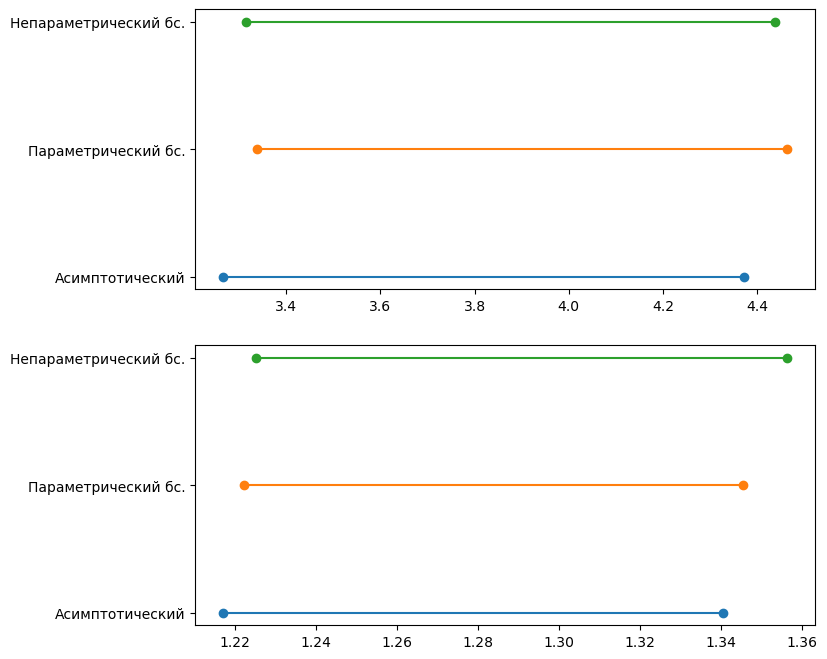

In [541]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
(ax1, ax2) = axs

for i, ci in enumerate([ci_theta, p_bs_theta_ci, np_bs_theta_ci]):
    ax1.plot((ci[0], ci[1]), (i, i), 'o-')
_ = ax1.set_yticks(range(3),["Асимптотический", "Параметрический бс.", "Непараметрический бс."])

for i, ci in enumerate([ci_med, p_bs_med_ci, np_bs_med_ci]):
    ax2.plot((ci[0], ci[1]), (i, i), 'o-')
_ = ax2.set_yticks(range(3),["Асимптотический", "Параметрический бс.", "Непараметрический бс."])
